<a href="https://colab.research.google.com/github/calderonf/CursoMachineLearning/blob/master/Codigo/ANN_regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt #for plotting
"""
x, y, coef = datasets.make_regression(n_samples=500,#number of samples
                                      n_features=1,#number of features
                                      n_informative=1,#number of useful features 
                                      noise=8,#bias and standard deviation of the guassian noise
                                      coef=True,#true coefficient used to generated the data
                                      random_state=4) #set for same data points for each run
print(coef)
# Scale feature x (years of experience) to range 0..20
x = np.interp(x, (x.min(), x.max()), (0, 20))
# Scale target y (salary) to range 2000000..15000000 
y = np.interp(y, (y.min(), y.max()), (2000000, 15000000))


"""
#Otros datos a hacer regresión
n_samples = 1000
rng = np.random.RandomState(0)
#x = rng.randn(n_samples, 1)
x = ((rng.rand(n_samples,1)-0.5)*3)
noise = rng.normal(loc=0.0, scale=0.3, size=n_samples)
y = (1.5 * x[:, 0] + 3*np.sin(2 * np.pi * x[:, 0]) - noise)



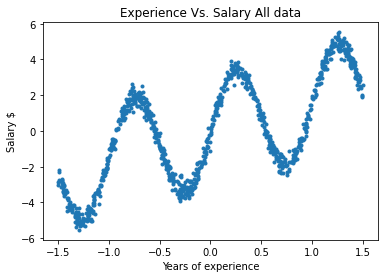

(1000, 1)
(1000,)


In [79]:
plt.figure()
plt.plot(x,y,'.')
plt.xlabel('Years of experience')
plt.ylabel('Salary $')
plt.title('Experience Vs. Salary All data')
plt.show()
print(x.shape)
print(y.shape)

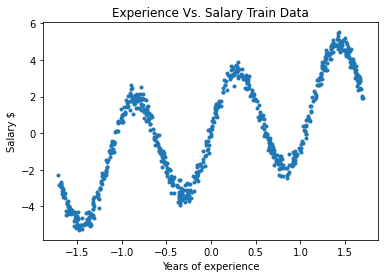

In [80]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y,random_state=1)
"""
X_train=x_train
X_test=x_test
"""
scaler = StandardScaler()#StandardScaler, MinMaxScaler
scaler.fit(x_train)
X_train =scaler.transform(x_train)
X_test  = scaler.transform(x_test)

plt.figure()
plt.plot(X_train,y_train,'.',label='train data')
plt.xlabel('Years of experience')
plt.ylabel('Salary $')
plt.title('Experience Vs. Salary Train Data')
plt.show()

In [112]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor(hidden_layer_sizes=(100,50),alpha=0.1,activation="relu",random_state=1,learning_rate='adaptive', max_iter=6000,solver="adam",verbose=True)
#regr = MLPRegressor(random_state=1, max_iter=500)

print(regr.fit(X_train, y_train))


Iteration 1, loss = 3.94797630
Iteration 2, loss = 3.66460081
Iteration 3, loss = 3.42723552
Iteration 4, loss = 3.21262407
Iteration 5, loss = 3.01609202
Iteration 6, loss = 2.85272007
Iteration 7, loss = 2.70034198
Iteration 8, loss = 2.57177854
Iteration 9, loss = 2.45984970
Iteration 10, loss = 2.35499840
Iteration 11, loss = 2.27936623
Iteration 12, loss = 2.20760800
Iteration 13, loss = 2.16070056
Iteration 14, loss = 2.12458619
Iteration 15, loss = 2.09749337
Iteration 16, loss = 2.07735266
Iteration 17, loss = 2.06394983
Iteration 18, loss = 2.05325625
Iteration 19, loss = 2.04382158
Iteration 20, loss = 2.03409283
Iteration 21, loss = 2.02499060
Iteration 22, loss = 2.01607475
Iteration 23, loss = 2.00803442
Iteration 24, loss = 2.00029538
Iteration 25, loss = 1.99161623
Iteration 26, loss = 1.98414910
Iteration 27, loss = 1.97560922
Iteration 28, loss = 1.96719155
Iteration 29, loss = 1.95795318
Iteration 30, loss = 1.94921421
Iteration 31, loss = 1.94223375
Iteration 32, los

In [113]:
#TAREA:
# investigar que es el R^2, como se analizan los resultados!!
# investigar que pasa si los datos no estan normalizados en su entrada "y en su salida. :'( "
# Disminuir el numero de datos con los que entrenan y ver que pasa!!! Concluir
print("R^2 entrenamiento",regr.score(X_train,y_train))
print("R^2 validacion",regr.score(X_test, y_test))

R^2 entrenamiento 0.9863944709984582
R^2 validacion 0.9869148299921336


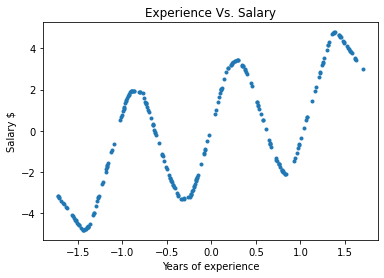

In [116]:
y_test_pred=regr.predict(X_test)
plt.figure()
plt.plot(X_test,y_test_pred,'.',label='Complete data')
plt.xlabel('Years of experience')
plt.ylabel('Salary $')
plt.title('Experience Vs. Salary')
plt.show()

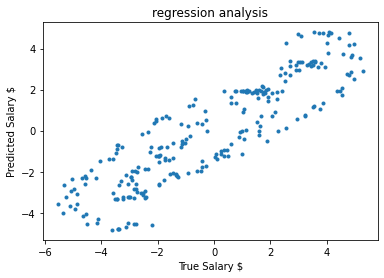

In [117]:
y_test_pred=regr.predict(x_test)
plt.figure()
plt.plot(y_test,y_test_pred,'.')
plt.xlabel('True Salary $')
plt.ylabel('Predicted Salary $')
plt.title('regression analysis')
plt.show()